In [2]:
import lnls
lnls.notebook.turn_code_on_off_html()

<IPython.core.display.Javascript object>


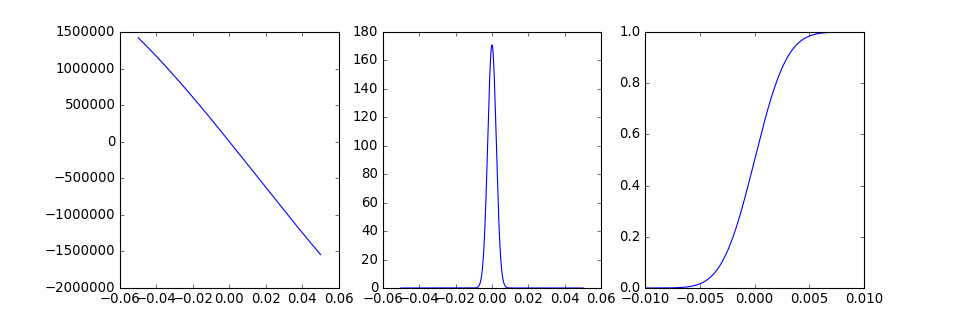

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import time
import cppcolleff as colef
def fliplr(x):
    y = colef.my_Dvector(x)
    si = x.size()
    for i in range(si):
        y[i] = x[si-1-i]
    return y

ring = colef.Ring_t()
ring.energy   = 3e9
ring.tunex    = 0.13
ring.emitx    = 250e-12
ring.espread  = 8e-4
ring.circum   = 518.396
ring.T0       = ring.circum/colef.light_speed
ring.mom_comp = 1.7e-4
ring.harm_num = 864
ring.betax    = 19

phi0, V0, krf = (171.24/360*colef.TWOPI),  3e6,   colef.TWOPI*ring.harm_num/ring.circum
U0 = V0*np.sin(phi0)

phil, Vl, kl = -2/360*colef.TWOPI, 1.02e6*0, krf*3
Ul = Vl*np.sin(phil)

ss, V = colef.my_Dvector(), colef.my_Dvector()
for i in range(-10000,10001):
    s=1e-4*5e-2*i;
    ss.push_back(s);
    V.push_back(V0*np.sin(phi0+krf*s)-U0 + Vl*np.sin(phil+kl*s)-Ul);
    
f,ax = plt.subplots(1,3, figsize=(12,4))
ax[0].plot(ss,V)
ring.cav.set_xy(ss,V)
dist= ring.get_distribution()
cav_s = ring.cav.ref_to_xi()
ax[1].plot(cav_s,dist)
idist = ring.get_integrated_distribution()
ax[2].plot(idist.ref_to_yi(),idist.ref_to_xi())
ax[2].set_xlim([-0.01,0.01])
plt.show()

bun = colef.Bunch_t(10000,1e-3)
colef.generate_bunch(ring,bun,3)

In [5]:
xx = np.zeros(bun.particles.size())
xl = np.zeros(bun.particles.size())
ss = np.zeros(bun.particles.size())
de = np.zeros(bun.particles.size())
for i in range(bun.particles.size()):
    xx[i] = bun.particles[i].xx
    xl[i] = bun.particles[i].xl
    ss[i] = bun.particles[i].ss
    de[i] = bun.particles[i].de

<IPython.core.display.Javascript object>


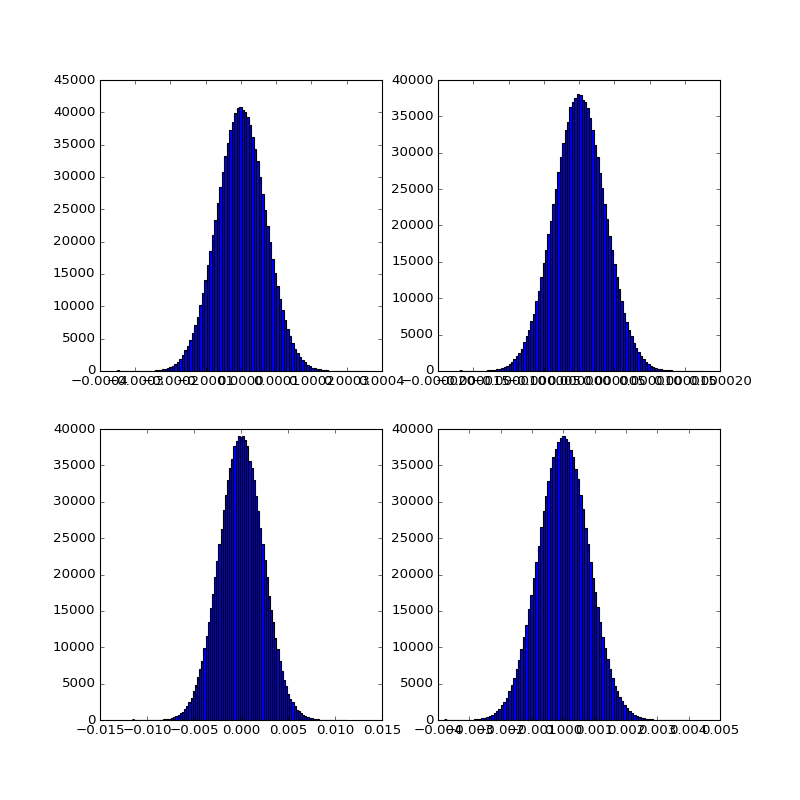

In [6]:
f,ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].hist(xx,100)
ax[0,1].hist(xl,100)
ax[1,0].hist(ss,100)
ax[1,1].hist(de,100)
plt.show()

<IPython.core.display.Javascript object>


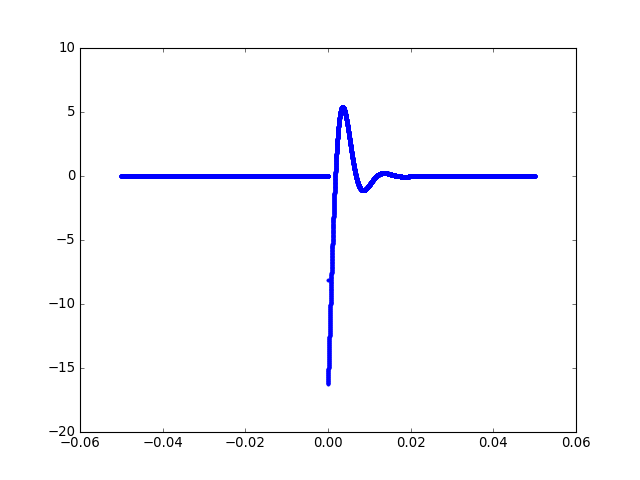

In [2]:
wake = colef.Wake_t();
wake.Wl.resonator = True;
wake.Wl.wr.push_back(30e9*colef.TWOPI);
wake.Wl.Rs.push_back(1e4);
wake.Wl.Q.push_back(1);

Wl = wake.Wl.get_wake_at_points(cav_s,bun.Ib*ring.T0*(cav_s[1]-cav_s[0]))
plt.figure()
plt.plot(cav_s,Wl,'.')
plt.show()

<IPython.core.display.Javascript object>


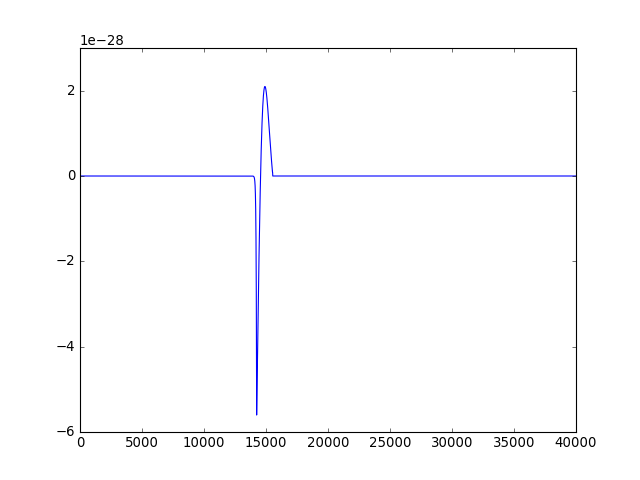

40001


In [4]:
Wl = wake.Wl.get_wake_at_points(cav_s,bun.Ib*ring.T0*(cav_s[1]-cav_s[0]))
dist= ring.get_distribution()
# Wl2 = fliplr(Wl)
#fliplr(dist)
a1 = colef.convolution_full_orig(dist,Wl)
a2 = colef.convolution_full(dist,Wl)
# a1 = colef.convolution_same_orig(dist,Wl)
# a2 = colef.convolution_same(dist,Wl)
plt.figure()
for i in range(a1.size()): a1[i] -= a2[i]
print(a1.size())
plt.plot(a1)
# plt.plot(a2)
# plt.plot(cav_s,Wl)
# plt.plot(cav_s,dist)
# plt.plot(cav_s,ring.cav.ref_to_yi())
#plt.plot(cav_s,dist)
# plt.xlim([-0.05,0.05])
plt.show()

<IPython.core.display.Javascript object>


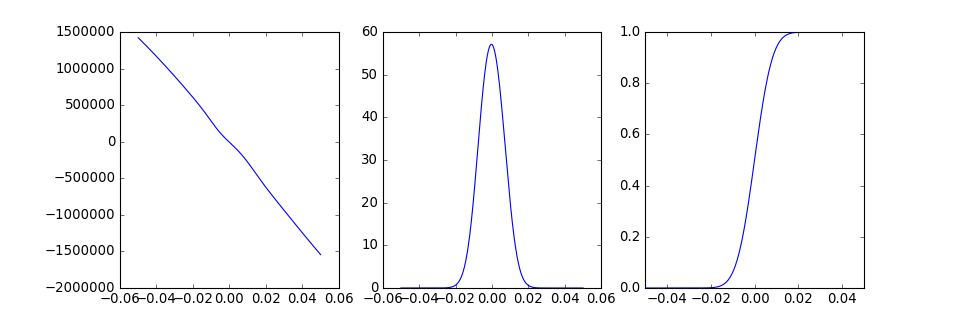

In [8]:
V = colef.solve_Haissinski(wake,ring,1e-3)
cav_s = ring.cav.ref_to_xi()
f,ax = plt.subplots(1,3, figsize=(12,4))
ax[0].plot(cav_s,V)
dist= ring.get_distribution(V)
ax[1].plot(cav_s,dist)
idist = ring.get_integrated_distribution()
ax[2].plot(idist.ref_to_yi(),idist.ref_to_xi())
ax[2].set_xlim([-0.05,0.05])
plt.show()

In [9]:
ring.espread = 8e-4;

0.00220734446991432